The objective of this notebook is to display some descriptive statistics of the Twitter data, in particular, to address possible concerns on (self) selection into Twitter concerns

In [1]:
import communicationwmongo as commu
import home_location as home
db=commu.connecttoLocaldb(database='twitter') 
import analysis as a
import pandas as pd

In [2]:
gdf=a.read_radios_from_db(db, collectionname='radios')

In [3]:
gdf.head()

,COD_2010_1,_id,geometry,pop_2010_1,tweets,totalcount,surface_km2
0,020131101,5e229c986e7ccd374ce87221,POLYGON ((-58.45867059439924 -34.5371596951979...,568.0,{'totalcount': 28538},28538,2.239214
1,020130105,5e229c986e7ccd374ce87222,POLYGON ((-58.46630448793712 -34.5366855239929...,835.0,{'totalcount': 2591},2591,0.012904
2,020130110,5e229c986e7ccd374ce87223,POLYGON ((-58.46882953705805 -34.5390214575723...,709.0,{'totalcount': 635},635,0.030020
3,020130107,5e229c986e7ccd374ce87224,POLYGON ((-58.46723810560196 -34.5382172725538...,509.0,{'totalcount': 1210},1210,0.089861
4,020130106,5e229c986e7ccd374ce87225,POLYGON ((-58.46530303532612 -34.5382994003207...,882.0,{'totalcount': 1686},1686,0.058258


In [4]:
gdf.pop_2010_1.describe()

count    15705.000000
mean       957.867049
std        466.085910
min          0.000000
25%        680.000000
50%        902.000000
75%       1187.000000
max       5895.000000
Name: pop_2010_1, dtype: float64

# Exploring total tweet counts and their relationship with radius surface, and population density

Since radius surfaces are designed in order to optimize the censal radius design,  surfaces must be bigger in less populated areas. The average population per censal radius is 1000 but there is considerable variability.


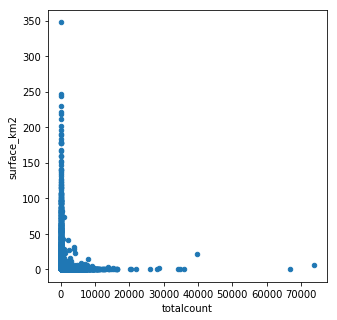

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5]
df=pd.DataFrame(gdf)
df.plot.scatter(x='totalcount',y='surface_km2')

In [6]:
import numpy as np
df['logtotalcount']=df.apply(lambda x: np.log(x['totalcount']), axis=1)
df['logsurface']=df.apply(lambda x: np.log(x['surface_km2']), axis=1)


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


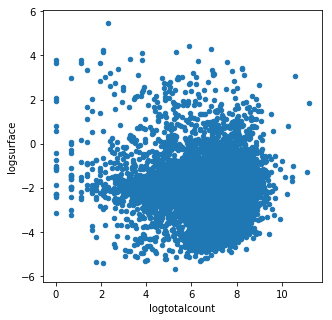

In [7]:
df.plot.scatter(x='logtotalcount',y='logsurface')

In [8]:
df['density']=df.apply(lambda x: x['pop_2010_1']/x['surface_km2'], axis=1)
df['logdensity']=df.apply(lambda x: np.log(x['density']), axis=1)


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


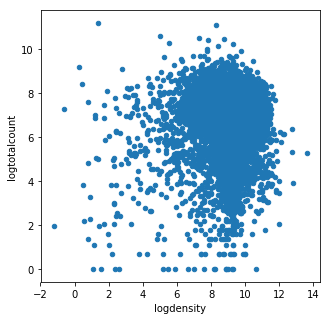

In [9]:
df.plot.scatter(x='logdensity',y='logtotalcount')

In [10]:
import statsmodels.api as sm

In [11]:
df2=df.copy()
df2=df2[['logdensity','logtotalcount']].dropna()
df2=df2.replace([np.inf, -np.inf], np.nan)
df2=df2[['logdensity','logtotalcount']].dropna()
df2.head()

,logdensity,logtotalcount
0,5.535997,10.258992
1,11.077684,7.859799
2,10.069738,6.453625
3,8.641942,7.098376
4,9.625065,7.430114


In [12]:
X = sm.add_constant(df2['logdensity'])
Y=df2['logtotalcount']
results = sm.OLS(Y, X).fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:          logtotalcount   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     75.97
Date:                Thu, 30 Jan 2020   Prob (F-statistic):           3.22e-18
Time:                        15:47:36   Log-Likelihood:                -21642.
No. Observations:               13204   AIC:                         4.329e+04
Df Residuals:                   13202   BIC:                         4.330e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1153      0.089     69.018      0.0

# These are total number of users spatially located according to the home_location algorithm

The objective here is to examine the spatial distribution of tweeter users homes

In [13]:
df2 = pd.DataFrame(list(db['radiocount_users'].find()))
df2=pd.merge(gdf, df2, on='COD_2010_1')
import geopandas as gpd
gdf2=gpd.GeoDataFrame(df2)

The problem in the figure is related with the way I handle precision in the home location algorithm, by discarding centesimals in the coordinates. An alternative approach using DBSCAN clustering would not produce this result.

(-34.7, -34.54)

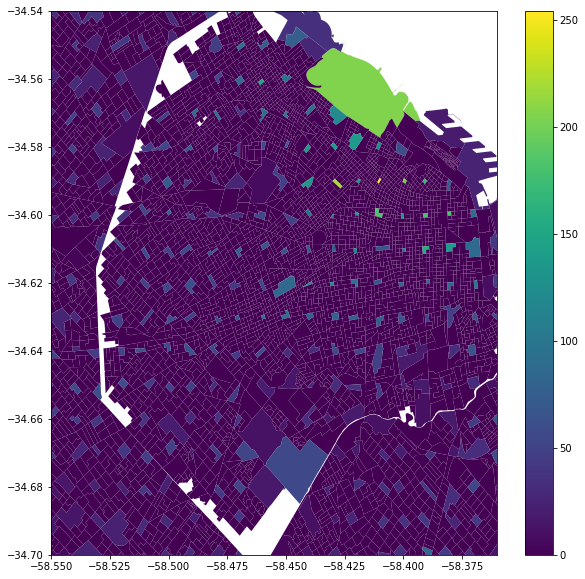

In [14]:
plt.rcParams['figure.figsize'] = [10, 10]

#gdf2
fig, ax = plt.subplots(1, 1)

base=gdf2.plot(column='totalusers', ax=ax, legend=True,)
base.set_xlim(-58.55, -58.36)
base.set_ylim(-34.7, -34.54)


#divider = make_axes_locatable(ax)

#cax = divider.append_axes("right", size="5%", pad=0.1)

#base=gdf.loc[gdf['totalcount']<30000].plot(column='totalcount', ax=ax, legend=True, cax=cax)
